# cleo.DataLevels examples

In [1]:
import matplotlib as mpl
import numpy as np
from cleo.graphics import DataLevels

In [2]:
%matplotlib inline 

In [3]:
a = np.array([-1., 0., 1.1, 1.9, 9.])
cm = mpl.cm.get_cmap('RdYlBu_r')

# Basic principles

### Automatic levels 

If data is set, the levels are chosen according to the min and max of the data:

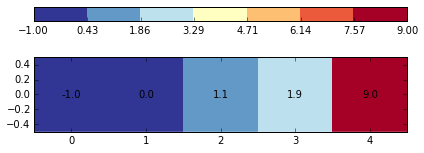

In [4]:
dl = DataLevels(a, cmap=cm)
dl.visualize(orientation='horizontal', add_values=True)

The Default number of levels is 8, but it's up to you to choose something else:

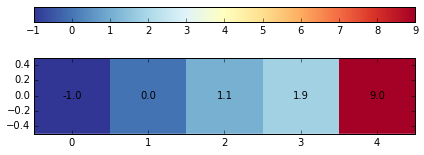

In [5]:
dl = DataLevels(a, cmap=cm, nlevels=256)
dl.visualize(orientation='horizontal', add_values=True)

### Automatic levels with min and max value

You can also specify the boundaries of the levels to choose:

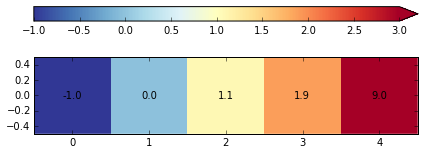

In [6]:
dl = DataLevels(a, cmap=cm, nlevels=256, vmax=3)
dl.visualize(orientation='horizontal', add_values=True)

You see that the colorbar has been extended. This behavior is forced by DataLevels and prevents unexpected clipping and such. If you set another data, it will remember your choice for a vmax:

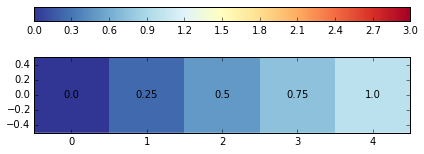

In [7]:
dl.set_data(np.arange(5) / 4)
dl.visualize(orientation='horizontal', add_values=True)

However vmin has changed, of course. The object remembers what has to be chosen automatically and what was previously set.

### User levels

The same is true when the user specifies the levels:

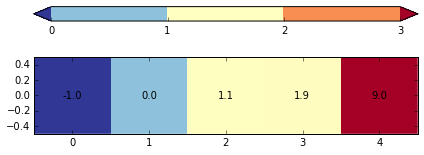

In [8]:
dl = DataLevels(a, cmap=cm, levels=[0, 1, 2, 3])
dl.visualize(orientation='horizontal', add_values=True)

Note that the colors have been chosen to cover the full palette, which is much better than the default behavior (see https://github.com/matplotlib/matplotlib/issues/4850).

Since the color choice is automated, when changing the data the colorbar also changes:

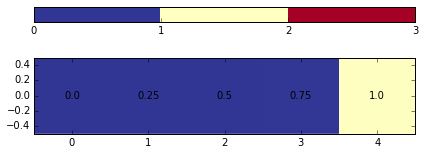

In [9]:
dl.set_data(np.arange(5) / 4)
dl.visualize(orientation='horizontal', add_values=True)

Since the new data remains within the level range, there is no need to extend the colorbar. Maybe you'd like the two plots above to have the same color code. For this you shoudl set the extend keyword:

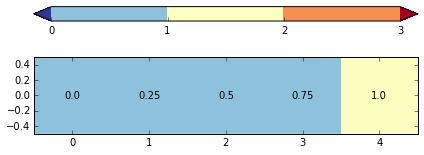

In [10]:
dl.set_extend('both')
dl.visualize(orientation='horizontal', add_values=True)

Cleo made the choice to warn you if you did something wrong that hides information from the data:

/home/mowglie/Documents/git/cleo/cleo/graphics.py:171: RuntimeWarning: Minimum data out of bounds.
  warnings.warn('Minimum data out of bounds.', RuntimeWarning)
/home/mowglie/Documents/git/cleo/cleo/graphics.py:173: RuntimeWarning: Maximum data out of bounds.
  warnings.warn('Maximum data out of bounds.', RuntimeWarning)


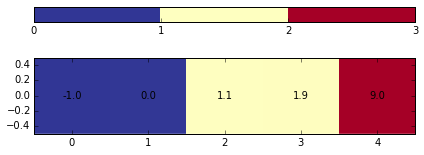

In [11]:
dl = DataLevels(a, cmap=cm, levels=[0, 1, 2, 3], extend='neither')
dl.visualize(orientation='horizontal', add_values=True)

# Using DataLevels for your own visualisations

The examples above made use of the utilitary function visualize(), which is just here to have a look at the data. Here's a "real world" example with a scatterplot:

In [12]:
# Make the data
x = np.random.randn(1000)
y = np.random.randn(1000)
z = x**2 + y**2

In [13]:
# The datalevel step
dl = DataLevels(z, cmap=cm, levels=np.arange(6))

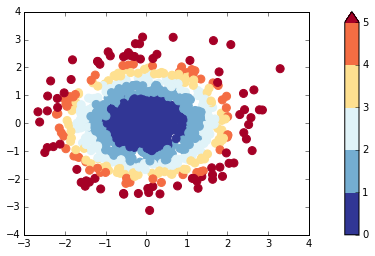

In [14]:
# The actual plot
fig, ax = plt.subplots(1)
ax.scatter(x, y, color=dl.to_rgb(), s=64)
cbar = dl.append_colorbar(ax, "right", size="5%", pad=0.5) # Note that the DataLevel class has to draw the colorbar

### This also works for images:

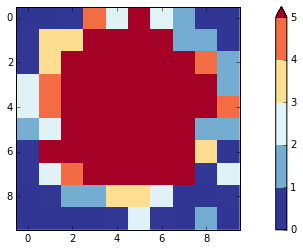

In [15]:
# Make the data
img, xi, yi = np.histogram2d(x, y)
# The datalevel step
dl = DataLevels(img, cmap=cm, levels=np.arange(6))
# The actual plot
fig, ax = plt.subplots(1)
toplot = dl.to_rgb()
ax.imshow(toplot, interpolation='none')
cbar = dl.append_colorbar(ax, "right", size="5%", pad=0.5) # Note that the DataLevel class has to draw the colorbar

### And with missing data:

In [16]:
cm.set_bad('green')
img[1:5, 1:5] = np.NaN

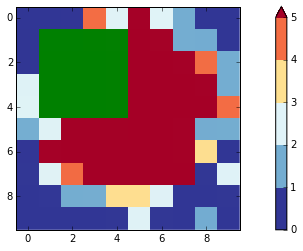

In [17]:
# The datalevel step
dl = DataLevels(img, cmap=cm, levels=np.arange(6))
# The actual plot
fig, ax = plt.subplots(1)
toplot = dl.to_rgb() # note that the shape is preserved
ax.imshow(toplot, interpolation='none')
cbar = dl.append_colorbar(ax, "right", size="5%", pad=0.5)  # Note that the DataLevel class has to draw the colorbar